In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score, f1_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as sm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# 抓取數據並轉換成csv 檔
## 基礎數據

In [3]:
from nba_api.stats.endpoints import leaguegamelog
for i in range(2016,2021):
    leaguegame=leaguegamelog.LeagueGameLog(0,season=i).get_data_frames()[0]
    df = pd.DataFrame(leaguegame)
df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22020,1610612751,BKN,Brooklyn Nets,0022000001,2020-12-22,BKN vs. GSW,W,240,42,...,44,57,24,11,7,20,22,125,26,1
1,22020,1610612744,GSW,Golden State Warriors,0022000001,2020-12-22,GSW @ BKN,L,240,37,...,34,47,26,6,6,18,24,99,-26,1
2,22020,1610612746,LAC,LA Clippers,0022000002,2020-12-22,LAC @ LAL,W,240,44,...,29,40,22,10,3,16,29,116,7,1
3,22020,1610612747,LAL,Los Angeles Lakers,0022000002,2020-12-22,LAL vs. LAC,L,240,38,...,37,45,22,4,2,19,20,109,-7,1
4,22020,1610612738,BOS,Boston Celtics,0022000003,2020-12-23,BOS vs. MIL,W,240,48,...,27,37,23,8,6,7,17,122,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,22020,1610612761,TOR,Toronto Raptors,0022001079,2021-05-16,TOR vs. IND,L,240,39,...,32,48,21,8,3,12,12,113,-12,1
2156,22020,1610612746,LAC,LA Clippers,0022001074,2021-05-16,LAC @ OKC,L,240,45,...,28,44,17,8,3,3,14,112,-5,1
2157,22020,1610612760,OKC,Oklahoma City Thunder,0022001074,2021-05-16,OKC vs. LAC,W,240,50,...,40,54,20,1,12,15,11,117,5,1
2158,22020,1610612747,LAL,Los Angeles Lakers,0022001072,2021-05-16,LAL @ NOP,W,240,45,...,34,42,30,14,5,10,16,110,12,1


In [ ]:
df.to_csv(str(i)+'_tradition.csv')

## 進階數據

In [4]:
from nba_api.stats.endpoints import boxscoreadvancedv2
game_id='0022000001'
leaguegame=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
leaguegame

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0022000001,1610612744,Warriors,GSW,Golden State,240:00,86.8,88.4,110.5,111.6,...,16.1,0.424,0.454,1.0,0.201,113.6,112.0,93.33,112,0.35
1,0022000001,1610612751,Nets,BKN,Brooklyn,240:00,110.5,111.6,86.8,88.4,...,17.9,0.538,0.589,1.0,0.201,113.6,112.0,93.33,112,0.65


In [ ]:
game_null='00'
for i in range(22000002,22001081):
    game_id=game_null+str(i)
    leaguegames=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
    leaguegame=leaguegame.append(leaguegames)

In [ ]:
leaguegame.to_csv('2020_advanced.csv')

In [6]:
game_id='0021900001'
leaguegame_2019=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
leaguegame_2019

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0021900001,1610612761,Raptors,TOR,Toronto,265:00,107.7,113.0,107.2,108.9,...,14.8,0.476,0.543,1.0,0.197,106.2,102.79,85.66,115,0.531
1,0021900001,1610612740,Pelicans,NOP,New Orleans,265:00,107.2,108.9,107.7,113.0,...,17.0,0.515,0.551,1.0,0.197,106.2,102.79,85.66,112,0.469


In [ ]:
game_null='00'
for i in range(21900002,21901319):
    game_id=game_null+str(i)
    leaguegames_2019=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
    leaguegame_2019=leaguegame_2019.append(leaguegames)

In [ ]:
leaguegame.to_csv('2019_advanced.csv')

In [7]:
game_id='0021800001'
leaguegame_2018=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
leaguegame_2018

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0021800001,1610612755,76ers,PHI,Philadelphia,240:00,81.2,82.1,98.9,100.0,...,15.1,0.42,0.448,1.0,0.200,106.64,105.5,87.92,106,0.405
1,0021800001,1610612738,Celtics,BOS,Boston,240:00,98.9,100.0,81.2,82.1,...,14.3,0.49,0.509,1.0,0.198,106.64,105.5,87.92,105,0.595


In [ ]:
game_null='00'
for i in range(21800002,21801231):
    game_id=game_null+str(i)
    leaguegames_2018=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
    leaguegame_2018=leaguegame_2018.append(leaguegames_2018)

In [ ]:
leaguegame_2018.to_csv('2018_advanced.csv')

In [8]:
game_id='0021700001'
leaguegame_2017=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
leaguegame_2017

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0021700001,1610612739,Cavaliers,CLE,Cleveland,240:00,100.0,104.1,97.1,100.0,...,17.3,0.488,0.543,1.0,0.196,102.0,98.5,82.08,98,0.491
1,0021700001,1610612738,Celtics,BOS,Boston,240:00,97.1,100.0,100.0,104.1,...,12.1,0.455,0.500,1.0,0.191,102.0,98.5,82.08,99,0.509


In [ ]:
game_null='00'
for i in range(21700002,21701231):
    game_id=game_null+str(i)
    leaguegames_2017=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
    leaguegame_2017=leaguegame_2017.append(leaguegames_2017)

In [ ]:
leaguegame_2017.to_csv('2017_advanced.csv')

In [9]:
game_id='0021600001'
leaguegame_2016=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
leaguegame_2016

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0021600001,1610612752,Knicks,NYK,New York,240:00,87.3,87.1,110.0,115.8,...,17.8,0.420,0.459,1.0,0.202,103.58,101.0,84.17,101,0.297
1,0021600001,1610612739,Cavaliers,CLE,Cleveland,240:00,110.0,115.8,87.3,87.1,...,14.9,0.548,0.572,1.0,0.198,103.58,101.0,84.17,101,0.703


In [ ]:
game_null='00'
for i in range(21600002,21601231):
    game_id=game_null+str(i)
    leaguegames_2016=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id).get_data_frames()[1]
    leaguegame_2016=leaguegame_2016.append(leaguegames_2017)

In [ ]:
leaguegame_2016.to_csv('2016_advanced.csv')

# 把每季的基礎數據和進階數據合起來

In [10]:
df_2016a = pd.read_csv('2016_advanced.csv')
df_2017a = pd.read_csv('2017_advanced.csv')
df_2018a = pd.read_csv('2018_advanced.csv')
df_2019a = pd.read_csv('2019_advanced.csv')
df_2020a = pd.read_csv('2020_advanced.csv')
df_2021a = pd.read_csv('2021_advanced.csv')

In [11]:
df_2016t = pd.read_csv('2016_tradition.csv')
df_2017t = pd.read_csv('2017_tradition.csv')
df_2018t = pd.read_csv('2018_tradition.csv')
df_2019t = pd.read_csv('2019_tradition.csv')
df_2020t = pd.read_csv('2020_tradition.csv')
df_2021t = pd.read_csv('2021_tradition.csv')

In [13]:
df2=pd.concat([df_2016t,df_2017t,df_2018t,df_2019t,df_2020t,df_2021t])
df2.sort_values(["GAME_ID"], axis=0, ascending=[True], inplace=True)
df2

,Unnamed: 0,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,0,22016,1610612739,CLE,Cleveland Cavaliers,21600001,2016-10-25,CLE vs. NYK,W,240,...,40,51,31,12,5,15,22,117,29,1
1,1,22016,1610612752,NYK,New York Knicks,21600001,2016-10-25,NYK @ CLE,L,240,...,29,42,17,6,6,18,22,88,-29,1
4,4,22016,1610612757,POR,Portland Trail Blazers,21600002,2016-10-25,POR vs. UTA,W,240,...,29,34,22,5,3,13,18,113,9,1
5,5,22016,1610612762,UTA,Utah Jazz,21600002,2016-10-25,UTA @ POR,L,240,...,25,31,19,9,5,14,19,104,-9,1
2,2,22016,1610612744,GSW,Golden State Warriors,21600003,2016-10-25,GSW vs. SAS,L,240,...,27,35,24,11,6,16,19,100,-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2457,22021,1610612765,DET,Detroit Pistons,22101228,2022-04-10,DET @ PHI,L,240,...,27,42,26,4,4,20,16,106,-12,1
2438,2438,22021,1610612756,PHX,Phoenix Suns,22101229,2022-04-10,PHX vs. SAC,L,240,...,32,50,27,9,7,11,25,109,-7,1
2439,2439,22021,1610612758,SAC,Sacramento Kings,22101229,2022-04-10,SAC @ PHX,W,240,...,38,40,26,9,7,15,18,116,7,1
2437,2437,22021,1610612762,UTA,Utah Jazz,22101230,2022-04-10,UTA @ POR,W,240,...,45,60,23,8,6,17,16,111,31,1


由於抓取的數據是一場比賽佔兩行，一行為主隊數據，一行為客隊，為了之後的運用，必須將其合成一行

In [15]:
df2_even=df2[df2.index%2==0]

In [16]:
df2_even.set_axis(['Unnamed: 0', 'SEASON_ID', 'HOME_TEAM_ID','HOME_TEAM_ABBREVIATION','HOME_TEAM_NAME','GAME_ID','GAME_DATE','MATCHUP','HOME_WL','HOME_MIN','HOME_FGM','HOME_FGA','HOME_FG_PCT','HOME_FG3M','HOME_FG3A','HOME_FG3_PCT','HOME_FTM','HOME_FTA','HOME_FT_PCT','HOME_OREB','HOME_DREB','HOME_REB','HOME_AST','HOME_STL','HOME_BLK','HOME_TOV','HOME_PF','HOME_PTS','HOME_PLUS_MINUS','VIDEO_AVAILABLE'], axis='columns', inplace=True)

In [17]:
df2_odd=df2[df2.index%2!=0]
df2_odd.set_axis(['Unnamed: 0', 'SEASON_ID', 'AWAY_TEAM_ID','AWAY_TEAM_ABBREVIATION','AWAY_TEAM_NAME','GAME_ID','GAME_DATE','MATCHUP','AWAY_WL','AWAY_MIN','AWAY_FGM','AWAY_FGA','AWAY_FG_PCT','AWAY_FG3M','AWAY_FG3A','AWAY_FG3_PCT','AWAY_FTM','AWAY_FTA','AWAY_FT_PCT','AWAY_OREB','AWAY_DREB','AWAY_REB','AWAY_AST','AWAY_STL','AWAY_BLK','AWAY_TOV','AWAY_PF','AWAY_PTS','AWAY_PLUS_MINUS','VIDEO_AVAILABLE'], axis='columns', inplace=True)
df2_odd=df2_odd.drop(['Unnamed: 0'],axis=1)
df2_even=df2_even.drop(['Unnamed: 0'],axis=1)

In [18]:
df2_odd=df2_odd.reset_index(drop=True)
df2_even=df2_even.reset_index(drop=True)
df2_concat=pd.concat([df2_odd,df2_even],axis=1)

In [19]:
df2_concat

,SEASON_ID,AWAY_TEAM_ID,AWAY_TEAM_ABBREVIATION,AWAY_TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,AWAY_WL,AWAY_MIN,AWAY_FGM,...,HOME_DREB,HOME_REB,HOME_AST,HOME_STL,HOME_BLK,HOME_TOV,HOME_PF,HOME_PTS,HOME_PLUS_MINUS,VIDEO_AVAILABLE
0,22016,1610612752,NYK,New York Knicks,21600001,2016-10-25,NYK @ CLE,L,240,32,...,40,51,31,12,5,15,22,117,29,1
1,22016,1610612762,UTA,Utah Jazz,21600002,2016-10-25,UTA @ POR,L,240,40,...,29,34,22,5,3,13,18,113,9,1
2,22016,1610612759,SAS,San Antonio Spurs,21600003,2016-10-25,SAS @ GSW,W,240,47,...,27,35,24,11,6,16,19,100,-29,1
3,22016,1610612748,MIA,Miami Heat,21600004,2016-10-26,MIA @ ORL,W,240,47,...,30,45,20,5,4,11,15,96,-12,1
4,22016,1610612742,DAL,Dallas Mavericks,21600005,2016-10-26,DAL @ IND,L,265,45,...,44,52,30,11,6,16,23,130,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,22021,1610612761,TOR,Toronto Raptors,22101226,2022-04-10,TOR @ NYK,L,240,36,...,38,48,32,6,5,17,17,105,11,1
7055,22021,1610612748,MIA,Miami Heat,22101227,2022-04-10,MIA @ ORL,L,240,40,...,42,48,33,4,3,10,16,125,14,1
7056,22021,1610612765,DET,Detroit Pistons,22101228,2022-04-10,DET @ PHI,L,240,38,...,32,42,25,13,6,11,23,118,12,1
7057,22021,1610612758,SAC,Sacramento Kings,22101229,2022-04-10,SAC @ PHX,W,240,40,...,32,50,27,9,7,11,25,109,-7,1


In [20]:
df=pd.concat([df_2016a,df_2017a,df_2018a,df_2019a,df_2020a,df_2021a])
df

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0,21600001,1610612752,Knicks,NYK,New York,240:00,87.3,87.1,110.0,...,17.8,0.420,0.459,1.0,0.202,103.58,101.0,84.17,101,0.297
1,1,21600001,1610612739,Cavaliers,CLE,Cleveland,240:00,110.0,115.8,87.3,...,14.9,0.548,0.572,1.0,0.198,103.58,101.0,84.17,101,0.703
2,0,21600002,1610612762,Jazz,UTA,Utah,240:00,107.2,114.3,121.9,...,15.4,0.537,0.584,1.0,0.190,94.86,91.5,76.25,91,0.452
3,1,21600002,1610612757,Trail Blazers,POR,Portland,240:00,121.9,122.8,107.2,...,14.1,0.607,0.667,1.0,0.197,94.86,91.5,76.25,92,0.548
4,0,21600003,1610612759,Spurs,SAS,San Antonio,240:00,125.9,129.0,99.1,...,14.0,0.541,0.589,1.0,0.199,101.68,100.5,83.75,100,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,1,22101228,1610612765,Pistons,DET,Detroit,240:00:00,105.2,110.4,119.0,...,20.8,0.524,0.553,1.0,0.195,99.94,96.5,80.42,96,0.409
2456,0,22101229,1610612758,Kings,SAC,Sacramento,240:00:00,113.5,117.2,106.2,...,15.2,0.618,0.650,1.0,0.198,102.40,99.0,82.50,99,0.568
2457,1,22101229,1610612756,Suns,PHX,Phoenix,240:00:00,106.2,110.1,113.5,...,11.1,0.476,0.497,1.0,0.197,102.40,99.0,82.50,99,0.432
2458,0,22101230,1610612762,Jazz,UTA,Utah,240:00:00,110.2,112.1,80.6,...,17.2,0.506,0.562,1.0,0.202,100.00,98.5,82.08,99,0.697


In [21]:
df_even=df[df.index%2==0]

In [22]:
df_even.set_axis(['Unnamed: 0', 'GAME_ID', 'AWAY_TEAM_ID','AWAY_TEAM_NAME','AWAY_TEAM_ABBREVIATION','AWAY_TEAM_CITY','AWAY_MIN','AWAY_E_OFF_RATING','AWAY_OFF_RATING','AWAY_E_DEF_RATING','AWAY_DEF_RATING','AWAY_E_NET_RATING','AWAY_NET_RATING','AWAY_AST_PCT','AWAY_AST_TOV','AWAY_AST_RATIO','AWAY_OREB_PCT','AWAY_DREB_PCT','AWAY_REB_PCT','AWAY_E_TM_TOV_PCT','AWAY_TM_TOV_PCT','AWAY_EFG_PCT','AWAY_TS_PCT','AWAY_USG_PCT','AWAY_E_USG_PCT','AWAY_E_PACE','AWAY_PACE','AWAY_PACE_PER40','AWAY_POSS','AWAY_PIE'], axis='columns', inplace=True)

In [23]:
df_odd=df[df.index%2!=0]
df_odd.set_axis(['Unnamed: 0', 'GAME_ID', 'HOME_TEAM_ID','HOME_TEAM_NAME','HOME_TEAM_ABBREVIATION','HOME_TEAM_CITY','HOME_MIN','HOME_E_OFF_RATING','HOME_OFF_RATING','HOME_E_DEF_RATING','HOME_DEF_RATING','HOME_E_NET_RATING','HOME_NET_RATING','HOME_AST_PCT','HOME_AST_TOV','HOME_AST_RATIO','HOME_OREB_PCT','HOME_DREB_PCT','HOME_REB_PCT','HOME_E_TM_TOV_PCT','HOME_TM_TOV_PCT','HOME_EFG_PCT','HOME_TS_PCT','HOME_USG_PCT','HOME_E_USG_PCT','HOME_E_PACE','HOME_PACE','HOME_PACE_PER40','HOME_POSS','HOME_PIE'], axis='columns', inplace=True)

In [24]:
df_odd=df_odd.drop(['Unnamed: 0'],axis=1)
df_even=df_even.drop(['Unnamed: 0'],axis=1)
df_odd=df_odd.reset_index(drop=True)
df_even=df_even.reset_index(drop=True)
df_concat=pd.concat([df_odd,df_even],axis=1)

In [25]:
df_concat

,GAME_ID,HOME_TEAM_ID,HOME_TEAM_NAME,HOME_TEAM_ABBREVIATION,HOME_TEAM_CITY,HOME_MIN,HOME_E_OFF_RATING,HOME_OFF_RATING,HOME_E_DEF_RATING,HOME_DEF_RATING,...,AWAY_TM_TOV_PCT,AWAY_EFG_PCT,AWAY_TS_PCT,AWAY_USG_PCT,AWAY_E_USG_PCT,AWAY_E_PACE,AWAY_PACE,AWAY_PACE_PER40,AWAY_POSS,AWAY_PIE
0,21600001,1610612739,Cavaliers,CLE,Cleveland,240:00,110.0,115.8,87.3,87.1,...,17.8,0.420,0.459,1.0,0.202,103.58,101.0,84.17,101,0.297
1,21600002,1610612757,Trail Blazers,POR,Portland,240:00,121.9,122.8,107.2,114.3,...,15.4,0.537,0.584,1.0,0.190,94.86,91.5,76.25,91,0.452
2,21600003,1610612744,Warriors,GSW,Golden State,240:00,99.1,99.0,125.9,129.0,...,14.0,0.541,0.589,1.0,0.199,101.68,100.5,83.75,100,0.600
3,21600004,1610612748,Heat,MIA,Miami,240:00,108.0,112.5,98.6,102.1,...,11.7,0.416,0.474,1.0,0.199,98.68,95.0,79.17,94,0.430
4,21600005,1610612742,Mavericks,DAL,Dallas,265:00,103.5,105.2,112.1,112.1,...,13.8,0.559,0.602,1.0,0.200,105.46,104.6,87.17,116,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,22101226,1610612752,Knicks,NYK,New York,240:00:00,105.8,109.4,92.3,97.9,...,14.6,0.457,0.485,1.0,0.197,100.56,96.0,80.00,96,0.439
7055,22101227,1610612748,Heat,MIA,Miami,240:00:00,109.9,112.1,123.6,123.8,...,9.9,0.621,0.643,1.0,0.194,101.10,100.0,83.33,101,0.576
7056,22101228,1610612765,Pistons,DET,Detroit,240:00:00,105.2,110.4,119.0,121.6,...,11.3,0.551,0.601,1.0,0.196,99.94,96.5,80.42,97,0.591
7057,22101229,1610612756,Suns,PHX,Phoenix,240:00:00,106.2,110.1,113.5,117.2,...,15.2,0.618,0.650,1.0,0.198,102.40,99.0,82.50,99,0.568


# 把基礎數據跟進階數據合起來

In [26]:
df_final=pd.concat([df2_concat,df_concat],axis=1)

In [27]:
df_final

,SEASON_ID,AWAY_TEAM_ID,AWAY_TEAM_ABBREVIATION,AWAY_TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,AWAY_WL,AWAY_MIN,AWAY_FGM,...,AWAY_TM_TOV_PCT,AWAY_EFG_PCT,AWAY_TS_PCT,AWAY_USG_PCT,AWAY_E_USG_PCT,AWAY_E_PACE,AWAY_PACE,AWAY_PACE_PER40,AWAY_POSS,AWAY_PIE
0,22016,1610612752,NYK,New York Knicks,21600001,2016-10-25,NYK @ CLE,L,240,32,...,17.8,0.420,0.459,1.0,0.202,103.58,101.0,84.17,101,0.297
1,22016,1610612762,UTA,Utah Jazz,21600002,2016-10-25,UTA @ POR,L,240,40,...,15.4,0.537,0.584,1.0,0.190,94.86,91.5,76.25,91,0.452
2,22016,1610612759,SAS,San Antonio Spurs,21600003,2016-10-25,SAS @ GSW,W,240,47,...,14.0,0.541,0.589,1.0,0.199,101.68,100.5,83.75,100,0.600
3,22016,1610612748,MIA,Miami Heat,21600004,2016-10-26,MIA @ ORL,W,240,47,...,11.7,0.416,0.474,1.0,0.199,98.68,95.0,79.17,94,0.430
4,22016,1610612742,DAL,Dallas Mavericks,21600005,2016-10-26,DAL @ IND,L,265,45,...,13.8,0.559,0.602,1.0,0.200,105.46,104.6,87.17,116,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,22021,1610612761,TOR,Toronto Raptors,22101226,2022-04-10,TOR @ NYK,L,240,36,...,14.6,0.457,0.485,1.0,0.197,100.56,96.0,80.00,96,0.439
7055,22021,1610612748,MIA,Miami Heat,22101227,2022-04-10,MIA @ ORL,L,240,40,...,9.9,0.621,0.643,1.0,0.194,101.10,100.0,83.33,101,0.576
7056,22021,1610612765,DET,Detroit Pistons,22101228,2022-04-10,DET @ PHI,L,240,38,...,11.3,0.551,0.601,1.0,0.196,99.94,96.5,80.42,97,0.591
7057,22021,1610612758,SAC,Sacramento Kings,22101229,2022-04-10,SAC @ PHX,W,240,40,...,15.2,0.618,0.650,1.0,0.198,102.40,99.0,82.50,99,0.568


In [28]:
df_final = df_final.loc[:,~df_final.columns.duplicated()]

由於整理出來的數據太大(116列)，因此需要清除一些不必要的數據列

In [29]:
df_final=df_final.drop(labels=['SEASON_ID','AWAY_TEAM_ID','AWAY_TEAM_NAME','GAME_DATE','MATCHUP','AWAY_WL','AWAY_MIN',
                              'VIDEO_AVAILABLE','HOME_TEAM_ID','HOME_TEAM_NAME','HOME_MIN','HOME_TEAM_CITY','AWAY_TEAM_CITY'
                              ,],axis=1)

## 由於進階數據大多是基礎數據帶入公式後的延伸，因此將一些功能重複的數據列給移除
e.g.

功能相近:PACE跟PACE_PER40只差在PACE_PER40是用40分鐘作為分母，功能太接近因此刪除PACE_PER40

延伸數據:有了命中率就可以把出手數跟進球數刪掉，不只如此，TS%是從命中率、三分命中率和罰球命中率延伸出來，透過加權值的公式延伸出的
進階數據，因此可把命中率等數據刪掉PACE_PER40。

In [30]:
df_final=df_final.drop(labels=['AWAY_FGM','AWAY_FGA','AWAY_FG3M','AWAY_FG3A','AWAY_FTM','AWAY_FTA','HOME_FGM','HOME_FGA',
                               'HOME_FG3M', 'HOME_FG3A','HOME_FTM', 'HOME_FTA','HOME_E_OFF_RATING','HOME_E_DEF_RATING',
                              'HOME_E_NET_RATING','HOME_E_TM_TOV_PCT','HOME_E_USG_PCT', 'HOME_E_PACE','AWAY_E_OFF_RATING',
                              'AWAY_E_DEF_RATING','AWAY_E_NET_RATING','AWAY_E_TM_TOV_PCT','AWAY_E_USG_PCT','HOME_USG_PCT',
                               'AWAY_USG_PCT','HOME_PACE_PER40','AWAY_PACE_PER40'],axis=1)

In [31]:
df_final

,AWAY_TEAM_ABBREVIATION,GAME_ID,AWAY_FG_PCT,AWAY_FG3_PCT,AWAY_FT_PCT,AWAY_OREB,AWAY_DREB,AWAY_REB,AWAY_AST,AWAY_STL,...,AWAY_OREB_PCT,AWAY_DREB_PCT,AWAY_REB_PCT,AWAY_TM_TOV_PCT,AWAY_EFG_PCT,AWAY_TS_PCT,AWAY_E_PACE,AWAY_PACE,AWAY_POSS,AWAY_PIE
0,NYK,21600001,0.368,0.333,0.750,13,29,42,17,6,...,0.271,0.647,0.445,17.8,0.420,0.459,103.58,101.0,101,0.297
1,UTA,21600002,0.488,0.333,1.000,6,25,31,19,9,...,0.262,0.778,0.500,15.4,0.537,0.584,94.86,91.5,91,0.452
2,SAS,21600003,0.480,0.500,0.885,21,34,55,25,13,...,0.472,0.792,0.624,14.0,0.541,0.589,101.68,100.5,100,0.600
3,MIA,21600004,0.485,0.250,0.625,16,36,52,27,5,...,0.321,0.585,0.450,11.7,0.416,0.474,98.68,95.0,94,0.430
4,DAL,21600005,0.433,0.375,0.722,10,39,49,26,8,...,0.216,0.754,0.509,13.8,0.559,0.602,105.46,104.6,116,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,TOR,22101226,0.391,0.286,0.909,9,34,43,27,10,...,0.286,0.729,0.490,14.6,0.457,0.485,100.56,96.0,96,0.439
7055,MIA,22101227,0.426,0.380,0.750,10,37,47,20,5,...,0.191,0.772,0.510,9.9,0.621,0.643,101.10,100.0,101,0.576
7056,DET,22101228,0.458,0.324,0.655,15,27,42,26,4,...,0.302,0.627,0.479,11.3,0.551,0.601,99.94,96.5,97,0.591
7057,SAC,22101229,0.526,0.538,0.733,2,38,40,26,9,...,0.179,0.635,0.461,15.2,0.618,0.650,102.40,99.0,99,0.568


In [33]:
df_final['HomeWin'] = df_final.apply(lambda x : 1 if x['HOME_WL'] =='W' else 0, axis=1)
df_final=df_final.drop(labels=['HOME_WL'],axis=1)

In [34]:
df_final=df_final.drop(labels=['AWAY_FG_PCT', 'AWAY_FG3_PCT', 'AWAY_FT_PCT','AWAY_OREB', 'AWAY_DREB', 'AWAY_REB', 'AWAY_AST',
                               'AWAY_TOV','HOME_FG_PCT', 'HOME_FG3_PCT', 'HOME_FT_PCT','HOME_OREB', 'HOME_DREB',
                               'HOME_REB', 'HOME_AST','HOME_TOV','HOME_NET_RATING','HOME_AST_PCT','HOME_EFG_PCT',
                              'HOME_POSS','AWAY_NET_RATING','AWAY_AST_PCT','AWAY_EFG_PCT',
                              'AWAY_POSS'],axis=1)

In [35]:
df_final

,AWAY_TEAM_ABBREVIATION,GAME_ID,AWAY_STL,AWAY_BLK,AWAY_PF,AWAY_PTS,AWAY_PLUS_MINUS,HOME_TEAM_ABBREVIATION,HOME_STL,HOME_BLK,...,AWAY_AST_RATIO,AWAY_OREB_PCT,AWAY_DREB_PCT,AWAY_REB_PCT,AWAY_TM_TOV_PCT,AWAY_TS_PCT,AWAY_E_PACE,AWAY_PACE,AWAY_PIE,HomeWin
0,NYK,21600001,6,6,22,88,-29,CLE,12,5,...,13.0,0.271,0.647,0.445,17.8,0.459,103.58,101.0,0.297,1
1,UTA,21600002,9,5,19,104,-9,POR,5,3,...,15.6,0.262,0.778,0.500,15.4,0.584,94.86,91.5,0.452,1
2,SAS,21600003,13,3,19,129,29,GSW,11,6,...,16.8,0.472,0.792,0.624,14.0,0.589,101.68,100.5,0.600,0
3,MIA,21600004,5,7,22,108,12,ORL,5,4,...,15.1,0.321,0.585,0.450,11.7,0.474,98.68,95.0,0.430,0
4,DAL,21600005,8,8,27,121,-9,IND,11,6,...,19.5,0.216,0.754,0.509,13.8,0.602,105.46,104.6,0.571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,TOR,22101226,10,2,17,94,-11,NYK,6,5,...,19.6,0.286,0.729,0.490,14.6,0.485,100.56,96.0,0.439,1
7055,MIA,22101227,5,4,13,111,-14,ORL,4,3,...,23.5,0.191,0.772,0.510,9.9,0.643,101.10,100.0,0.576,1
7056,DET,22101228,4,4,16,106,-12,PHI,13,6,...,18.6,0.302,0.627,0.479,11.3,0.601,99.94,96.5,0.591,1
7057,SAC,22101229,9,7,18,116,7,PHX,9,7,...,20.0,0.179,0.635,0.461,15.2,0.650,102.40,99.0,0.568,0


In [ ]:
df_final.to_csv('final.csv')

## 增加elo rating
final.csv跟final_elo.csv只差在final_elo.csv多了主隊客隊名跟日期

In [36]:
df = pd.read_csv('final_elo.csv')

In [37]:
df

,Unnamed: 0,SEASON_ID,AWAY_TEAM_ABBREVIATION,GAME_ID,GAME_DATE,AWAY_STL,AWAY_BLK,AWAY_PF,AWAY_PTS,AWAY_PLUS_MINUS,...,AWAY_AST_RATIO,AWAY_OREB_PCT,AWAY_DREB_PCT,AWAY_REB_PCT,AWAY_TM_TOV_PCT,AWAY_TS_PCT,AWAY_E_PACE,AWAY_PACE,AWAY_PIE,HomeWin
0,0,22016,NYK,21600001,2016-10-25,6,6,22,88,-29,...,13.0,0.271,0.647,0.445,17.8,0.459,103.58,101.0,0.297,1
1,1,22016,UTA,21600002,2016-10-25,9,5,19,104,-9,...,15.6,0.262,0.778,0.500,15.4,0.584,94.86,91.5,0.452,1
2,2,22016,SAS,21600003,2016-10-25,13,3,19,129,29,...,16.8,0.472,0.792,0.624,14.0,0.589,101.68,100.5,0.600,0
3,3,22016,MIA,21600004,2016-10-26,5,7,22,108,12,...,15.1,0.321,0.585,0.450,11.7,0.474,98.68,95.0,0.430,0
4,4,22016,DAL,21600005,2016-10-26,8,8,27,121,-9,...,19.5,0.216,0.754,0.509,13.8,0.602,105.46,104.6,0.571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,7054,22021,TOR,22101226,2022-04-10,10,2,17,94,-11,...,19.6,0.286,0.729,0.490,14.6,0.485,100.56,96.0,0.439,1
7055,7055,22021,MIA,22101227,2022-04-10,5,4,13,111,-14,...,23.5,0.191,0.772,0.510,9.9,0.643,101.10,100.0,0.576,1
7056,7056,22021,DET,22101228,2022-04-10,4,4,16,106,-12,...,18.6,0.302,0.627,0.479,11.3,0.601,99.94,96.5,0.591,1
7057,7057,22021,SAC,22101229,2022-04-10,9,7,18,116,7,...,20.0,0.179,0.635,0.461,15.2,0.650,102.40,99.0,0.568,0


In [38]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

In [39]:
import math
import time
def win_probs(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400) 

    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom 
  
    return home_prob, away_prob

def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    return a*h/r

def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier


def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage) 

    if (home_score - away_score > 0) :
        home_win = 1 
        away_win = 0 
    else :
        home_win = 0 
        away_win = 1 
  
    k = elo_k(home_score - away_score, home_elo - away_elo)

    updated_home_elo = home_elo + k * (home_win - home_prob) 
    updated_away_elo = away_elo + k * (away_win - away_prob)
    
    return updated_home_elo, updated_away_elo

def get_prev_elo(team, date, season, team_stats, elo_df) :
    prev_game = team_stats[team_stats['GAME_DATE'] < game_date][(team_stats['HOME_TEAM_ABBREVIATION'] == team) | (team_stats['AWAY_TEAM_ABBREVIATION'] == team)].sort_values(by = 'GAME_DATE').tail(1).iloc[0] 

    if team == prev_game['HOME_TEAM_ABBREVIATION'] :
        elo_rating = elo_df[elo_df['GAME_ID'] == prev_game['GAME_ID']]['H_Team_Elo_After'].values[0]
    else :
        elo_rating = elo_df[elo_df['GAME_ID'] == prev_game['GAME_ID']]['A_Team_Elo_After'].values[0]
  
    if prev_game['SEASON_ID'] != season :
        return (0.75 * elo_rating) + (0.25 * 1505)
    else :
        return elo_rating

In [40]:
df.sort_values(by = 'GAME_DATE', inplace = True)
df.reset_index(inplace=True, drop = True)
elo_df = pd.DataFrame(columns=['GAME_ID', 'HOME_TEAM_ABBREVIATION', 'AWAY_TEAM_ABBREVIATION', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df = pd.DataFrame(columns=['GAME_ID','Team', 'Elo', 'Date', 'Where_Played', 'Season']) 

for index, row in df.iterrows(): 
    game_id = row['GAME_ID']
    game_date = row['GAME_DATE']
    season = row['SEASON_ID']
    h_team, a_team = row['HOME_TEAM_ABBREVIATION'], row['AWAY_TEAM_ABBREVIATION']
    h_score, a_score = row['HOME_PTS'], row['AWAY_PTS'] 

    if (h_team not in elo_df['HOME_TEAM_ABBREVIATION'].values and h_team not in elo_df['AWAY_TEAM_ABBREVIATION'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, df, elo_df)

    if (a_team not in elo_df['HOME_TEAM_ABBREVIATION'].values and a_team not in elo_df['AWAY_TEAM_ABBREVIATION'].values) :
        a_team_elo_before = 1500
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, df, elo_df)

    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 100)

    new_row = {'GAME_ID': game_id, 'HOME_TEAM_ABBREVIATION': h_team, 'AWAY_TEAM_ABBREVIATION': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'GAME_ID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'Season': season}
    teams_row_two = {'GAME_ID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'Season': season}
  
    elo_df = elo_df.append(new_row, ignore_index = True)
    teams_elo_df = teams_elo_df.append(teams_row_one, ignore_index=True)
    teams_elo_df = teams_elo_df.append(teams_row_two, ignore_index=True)

In [41]:
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df["Date"]]))
dates = sorted(dates, key=lambda x: time.strptime(x, '%m-%d-%Y'))
teams = df["AWAY_TEAM_ABBREVIATION"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")

for index, row in teams_elo_df.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo

teams_elo_df['Elo'] = teams_elo_df['Elo'].astype(float)
elo_df

,GAME_ID,HOME_TEAM_ABBREVIATION,AWAY_TEAM_ABBREVIATION,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,21600001,CLE,NYK,1500,1500,1515.357227,1484.642773
1,21600002,POR,UTA,1500,1500,1507.007092,1492.992908
2,21600003,GSW,SAS,1500,1500,1472.690560,1527.309440
3,21600004,ORL,MIA,1500,1500,1485.104132,1514.895868
4,21600005,IND,DAL,1500,1500,1507.007092,1492.992908
...,...,...,...,...,...,...,...
7054,22101218,CLE,MIL,1476.011666,1616.731205,1495.176556,1597.566315
7055,22101217,WAS,CHA,1448.431106,1521.950488,1434.143420,1536.238173
7056,22101216,BKN,IND,1549.924466,1343.54782,1552.205151,1341.267135
7057,22101222,LAC,OKC,1545.228494,1336.452128,1553.144942,1328.535680


In [42]:
df = pd.read_csv('final_elo.csv')
df=df.drop(labels=['AWAY_E_PACE'],axis=1)

## 算出隊伍近十場的數據

In [44]:
def get_avg_stats_last_10_games(team, game_date, df):
    
    b=np.zeros((10, 16))
    prev_game_df = df[df['GAME_DATE'] <= game_date][(df['HOME_TEAM_ABBREVIATION'] == team) | (df['AWAY_TEAM_ABBREVIATION'] == team)].sort_values(by = 'GAME_DATE').tail(10)
    j,k,l=0,0,0
    for i in prev_game_df['HOME_TEAM_ABBREVIATION'].values :
        if((i == team)):
            a=prev_game_df.iloc[j,11:27].values
            b[k]=a
            k=k+1
        j=j+1
    for i in prev_game_df['AWAY_TEAM_ABBREVIATION'].values :
        if((i == team)):
            b2=prev_game_df.iloc[l,5:10].values
            b3=prev_game_df.iloc[l,27:38].values
            c=np.concatenate((b2,b3))
            b[k]=c
            k=k+1
        l=l+1
    if(k<10):
        b=b[:k]
    h_df = pd.DataFrame(b,columns = ['STL', 'BLK','PF','PTS','PLUS_MINUS','OFF_RATING','DEF_RATING'
                                 ,'AST_TOV','AST_RATIO','OREB_PCT','DREB_PCT','REB_PCT','TM_TOV_PCT','TS_PCT','PACE','PIE'])

    return h_df.mean()

In [45]:
recent_performance_df = pd.DataFrame()
for season in df['SEASON_ID'].unique() :
    season_team_stats = df[df['SEASON_ID'] == season].sort_values(by = 'GAME_DATE').reset_index(drop = True)
    season_recent_performance_df = pd.DataFrame()

    for index, row in season_team_stats.iterrows() : 
        game_id = row['GAME_ID']
        game_date = row['GAME_DATE']
        h_team = row['HOME_TEAM_ABBREVIATION']
        a_team = row['AWAY_TEAM_ABBREVIATION']

        h_team_recent_performance = get_avg_stats_last_10_games(h_team, game_date, season_team_stats)
        h_team_recent_performance.index = ['H_Last_10_Avg_' + x for x in h_team_recent_performance.index]
        a_team_recent_performance = get_avg_stats_last_10_games(a_team, game_date, season_team_stats)
        a_team_recent_performance.index = ['A_Last_10_Avg_' + x for x in a_team_recent_performance.index]
        new_row = pd.concat([h_team_recent_performance, a_team_recent_performance], sort=False)
        season_recent_performance_df = season_recent_performance_df.append(new_row, ignore_index=True)
    recent_performance_df = pd.concat([recent_performance_df, season_recent_performance_df])

In [46]:
recent_performance_df

,H_Last_10_Avg_STL,H_Last_10_Avg_BLK,H_Last_10_Avg_PF,H_Last_10_Avg_PTS,H_Last_10_Avg_PLUS_MINUS,H_Last_10_Avg_OFF_RATING,H_Last_10_Avg_DEF_RATING,H_Last_10_Avg_AST_TOV,H_Last_10_Avg_AST_RATIO,H_Last_10_Avg_OREB_PCT,...,A_Last_10_Avg_DEF_RATING,A_Last_10_Avg_AST_TOV,A_Last_10_Avg_AST_RATIO,A_Last_10_Avg_OREB_PCT,A_Last_10_Avg_DREB_PCT,A_Last_10_Avg_REB_PCT,A_Last_10_Avg_TM_TOV_PCT,A_Last_10_Avg_TS_PCT,A_Last_10_Avg_PACE,A_Last_10_Avg_PIE
0,12.0,5.0,22.0,117.0,29.0,115.80,87.10,2.070,20.90,0.3530,...,115.80,0.940,13.00,0.2710,0.6470,0.4450,17.80,0.4590,101.000,0.2970
1,5.0,3.0,18.0,113.0,9.0,122.80,114.30,1.690,18.40,0.2220,...,122.80,1.360,15.60,0.2620,0.7780,0.5000,15.40,0.5840,91.500,0.4520
2,11.0,6.0,19.0,100.0,-29.0,99.00,129.00,1.500,18.10,0.2080,...,99.00,1.790,16.80,0.4720,0.7920,0.6240,14.00,0.5890,100.500,0.6000
3,10.0,4.0,24.0,120.0,6.0,112.90,118.80,1.930,20.40,0.2830,...,112.90,1.310,15.50,0.3260,0.7170,0.5220,15.80,0.6080,101.000,0.4970
4,6.0,3.0,29.0,94.0,-19.0,96.90,116.50,1.110,15.80,0.2670,...,96.90,1.710,17.70,0.3040,0.7330,0.5160,14.40,0.5800,97.000,0.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,5.8,5.2,18.1,111.6,-3.0,113.54,114.58,2.376,19.77,0.2282,...,121.31,2.515,21.62,0.2695,0.6990,0.4831,12.52,0.5907,98.800,0.4998
1226,7.9,7.1,22.0,118.4,3.7,114.20,114.08,1.625,17.26,0.2891,...,126.99,2.340,20.02,0.2690,0.6346,0.4394,13.29,0.5967,99.600,0.4318
1227,8.6,4.2,22.3,114.6,1.0,112.53,112.16,2.221,18.57,0.2768,...,108.90,1.896,19.60,0.2551,0.7539,0.5150,14.57,0.6009,99.234,0.5304
1228,7.2,6.3,18.5,119.5,6.1,119.15,114.79,2.180,18.95,0.2825,...,111.83,2.122,18.67,0.2796,0.7632,0.5154,12.98,0.5685,99.736,0.5075


## 將近十場數據跟elo rating合併

In [47]:
elo_df = elo_df.reset_index(drop=True)
recent_performance_df=recent_performance_df.reset_index(drop=True)
df_elorating=pd.concat([elo_df,recent_performance_df],axis=1)

In [48]:
df_elorating = df_elorating.drop(['H_Team_Elo_After', 'A_Team_Elo_After'], 1)
df_elorating=df_elorating.sort_values(by=['GAME_ID'])

In [49]:
df_elorating

,GAME_ID,HOME_TEAM_ABBREVIATION,AWAY_TEAM_ABBREVIATION,H_Team_Elo_Before,A_Team_Elo_Before,H_Last_10_Avg_STL,H_Last_10_Avg_BLK,H_Last_10_Avg_PF,H_Last_10_Avg_PTS,H_Last_10_Avg_PLUS_MINUS,...,A_Last_10_Avg_DEF_RATING,A_Last_10_Avg_AST_TOV,A_Last_10_Avg_AST_RATIO,A_Last_10_Avg_OREB_PCT,A_Last_10_Avg_DREB_PCT,A_Last_10_Avg_REB_PCT,A_Last_10_Avg_TM_TOV_PCT,A_Last_10_Avg_TS_PCT,A_Last_10_Avg_PACE,A_Last_10_Avg_PIE
0,21600001,CLE,NYK,1500,1500,12.0,5.0,22.0,117.0,29.0,...,115.80,0.940,13.00,0.2710,0.6470,0.4450,17.80,0.4590,101.000,0.2970
1,21600002,POR,UTA,1500,1500,5.0,3.0,18.0,113.0,9.0,...,122.80,1.360,15.60,0.2620,0.7780,0.5000,15.40,0.5840,91.500,0.4520
2,21600003,GSW,SAS,1500,1500,11.0,6.0,19.0,100.0,-29.0,...,99.00,1.790,16.80,0.4720,0.7920,0.6240,14.00,0.5890,100.500,0.6000
3,21600004,ORL,MIA,1500,1500,10.0,4.0,24.0,120.0,6.0,...,112.90,1.310,15.50,0.3260,0.7170,0.5220,15.80,0.6080,101.000,0.4970
4,21600005,IND,DAL,1500,1500,6.0,3.0,29.0,94.0,-19.0,...,96.90,1.710,17.70,0.3040,0.7330,0.5160,14.40,0.5800,97.000,0.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,22101226,NYK,TOR,1505.298337,1614.091387,10.0,3.5,17.2,114.7,1.4,...,115.68,1.683,16.69,0.2519,0.7239,0.4820,14.08,0.5589,98.600,0.4539
7046,22101227,ORL,MIA,1298.161656,1648.716786,6.8,4.8,19.4,109.5,5.2,...,109.73,2.149,18.25,0.3135,0.7368,0.5265,14.38,0.5757,96.805,0.5185
7045,22101228,PHI,DET,1595.332115,1381.202996,6.5,3.9,18.6,104.0,-9.0,...,115.00,2.089,19.31,0.2462,0.7184,0.4835,13.91,0.6125,96.600,0.5205
7050,22101229,PHX,SAC,1696.02292,1351.690322,8.0,4.4,17.4,116.8,8.0,...,114.84,2.218,18.57,0.2406,0.7405,0.5035,12.04,0.6225,96.100,0.5450


In [ ]:
df_elorating.to_csv('recent_performance.csv')

用兩種不同方式做的dataset配上不同的classifier來測準確度

In [50]:
df_final = pd.read_csv('final.csv')

In [51]:
df_final2 = pd.read_csv('recent_performance.csv')
df_final2=df_final2.drop(labels=['Unnamed: 0','AWAY_TEAM_ABBREVIATION','GAME_ID','HOME_TEAM_ABBREVIATION'],axis=1)
df_final2=df_final2.drop(labels=['A_Last_10_Avg_OREB_PCT','A_Last_10_Avg_DREB_PCT','A_Last_10_Avg_REB_PCT','H_Last_10_Avg_OREB_PCT',
                                'H_Last_10_Avg_DREB_PCT','H_Last_10_Avg_REB_PCT','H_Last_10_Avg_PTS','H_Last_10_Avg_PLUS_MINUS',
                                'A_Last_10_Avg_PTS','A_Last_10_Avg_PLUS_MINUS'],axis=1)

In [52]:
df_final=df_final.drop(labels=['Unnamed: 0','AWAY_TEAM_ABBREVIATION','GAME_ID','HOME_TEAM_ABBREVIATION'],axis=1)

發現有些場次的rebound percentage沒有被記錄，因而刪除這個數據列
也發現正負值跟得分與勝敗關聯太密切，會導致classifier準確率過高，因而捨棄

In [53]:
df_final=df_final.drop(labels=['AWAY_OREB_PCT','AWAY_DREB_PCT','AWAY_REB_PCT'],axis=1)
df_final=df_final.drop(labels=['HOME_OREB_PCT','HOME_DREB_PCT','HOME_REB_PCT'],axis=1)
df_final=df_final.drop(labels=['AWAY_PLUS_MINUS','HOME_PLUS_MINUS'],axis=1)
df_final=df_final.drop(labels=['AWAY_PTS','HOME_PTS'],axis=1)

In [54]:
X = df_final.drop(['HomeWin'], axis=1)
y = df_final['HomeWin']
y = y.astype(np.float64)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, shuffle=True)

In [55]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5,5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

ROC Score: 0.6370387350804059, F1 score: 0.6396852164137156 and Accuracy Score: 0.6368271954674221.


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

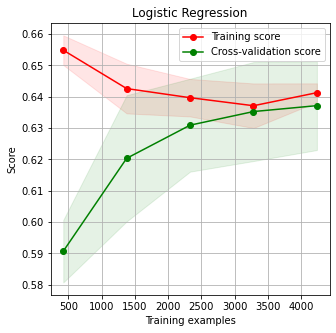

In [78]:
model1 = LogisticRegression(random_state=0,max_iter=500)
model1.fit(train_X, train_y)
preds1 = model1.predict(test_X)

roc_1 = roc_auc_score(test_y, preds1)
f1_1 = f1_score(test_y, preds1)
score_1 = model1.score(test_X, test_y)

print(f'ROC Score: {roc_1}, F1 score: {f1_1} and Accuracy Score: {score_1}.')

plot_learning_curve(model1, 'Logistic Regression', train_X, train_y)

ROC Score: 0.7110729265392193, F1 score: 0.7089041095890412 and Accuracy Score: 0.7110481586402266


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

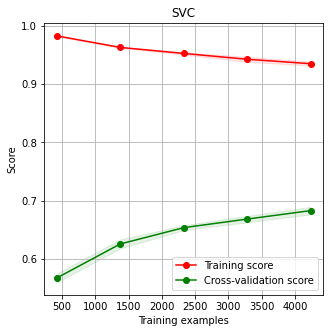

In [64]:
model2 = SVC(gamma=0.01)
model2.fit(train_X, train_y)
preds2 = model2.predict(test_X)

roc_2 = roc_auc_score(test_y, preds2)
f1_2 = f1_score(test_y, preds2)
score_2 = model2.score(test_X, test_y)

print(f'ROC Score: {roc_2}, F1 score: {f1_2} and Accuracy Score: {score_2}')

plot_learning_curve(model2, 'SVC', train_X, train_y)

ROC Score: 0.6770432812704674, F1 Score: 0.6739130434782609 and Accuracy Score: 0.6770538243626062


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

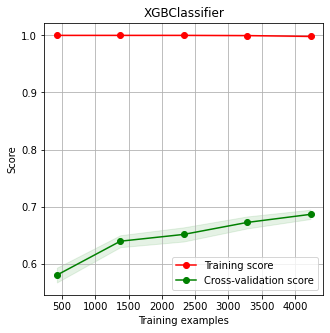

In [68]:
from xgboost import XGBClassifier
model3 = XGBClassifier(random_state=0)
model3.fit(train_X, train_y)
preds3 = model3.predict(test_X)

roc_3 = roc_auc_score(test_y, preds3)
f1_3 = f1_score(test_y, preds3)
score_3 = model3.score(test_X, test_y)

print(f'ROC Score: {roc_3}, F1 Score: {f1_3} and Accuracy Score: {score_3}')

plot_learning_curve(model3, 'XGBClassifier', train_X, train_y
                   )

ROC Score: 0.7155324307733403, F1 Score: 0.711825487944891 and Accuracy Score: 0.7155807365439093


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

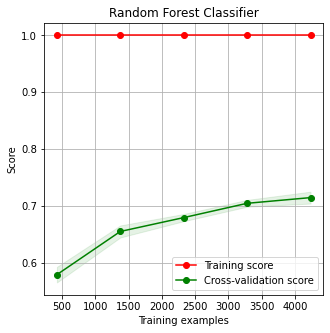

In [69]:
model4 = RandomForestClassifier(n_estimators=1000)
model4.fit(train_X, train_y)
preds4 = model4.predict(test_X)

roc_4 = roc_auc_score(test_y, preds4)
f1_4 = f1_score(test_y, preds4)
score_4 = model4.score(test_X, test_y)

print(f'ROC Score: {roc_4}, F1 Score: {f1_4} and Accuracy Score: {score_4}')

plot_learning_curve(model4, 'Random Forest Classifier', train_X, train_y
                   )

ROC Score: 0.6522427870970393, F1 Score: 0.652321630804077 and Accuracy Score: 0.6521246458923513


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

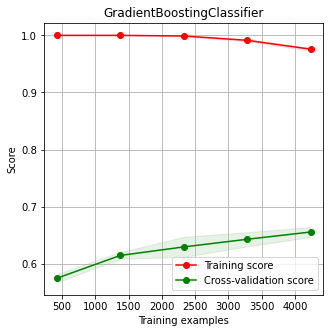

In [71]:
model5 = GradientBoostingClassifier(loss='deviance',n_estimators=1000,subsample=0.5,max_features='auto')
model5.fit(train_X, train_y)
preds5 = model5.predict(test_X)

roc_5 = roc_auc_score(test_y, preds5)
f1_5 = f1_score(test_y, preds5)
score_5 = model5.score(test_X, test_y)

print(f'ROC Score: {roc_5}, F1 Score: {f1_5} and Accuracy Score: {score_5}')

plot_learning_curve(model5, 'GradientBoostingClassifier', train_X, train_y)

ROC Score: 0.7048174203838833, F1 Score: 0.7021154945683247 and Accuracy Score: 0.7048158640226629


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

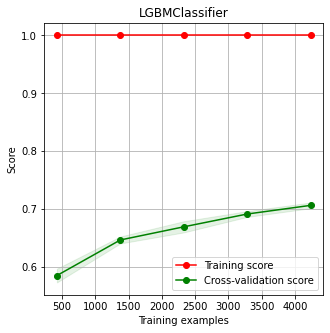

In [73]:
from lightgbm import LGBMClassifier
model6 = LGBMClassifier(n_estimators=1000,subsample=0.5)
model6.fit(train_X, train_y)
preds6 = model6.predict(test_X)

roc_6 = roc_auc_score(test_y, preds6)
f1_6 = f1_score(test_y, preds6)
score_6 = model6.score(test_X, test_y)

print(f'ROC Score: {roc_6}, F1 Score: {f1_6} and Accuracy Score: {score_6}')

plot_learning_curve(model6, 'LGBMClassifier', train_X, train_y
                   )

ROC Score: 0.5948246634663543, F1 Score: 0.5893164847788628 and Accuracy Score: 0.5949008498583569


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

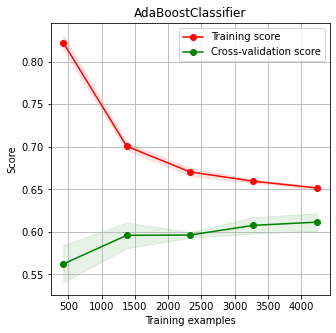

In [74]:
model7 = AdaBoostClassifier(random_state=0)
model7.fit(train_X, train_y)
preds7 = model7.predict(test_X)

roc_7 = roc_auc_score(test_y, preds7)
f1_7 = f1_score(test_y, preds7)
score_7 = model7.score(test_X, test_y)

print(f'ROC Score: {roc_7}, F1 Score: {f1_7} and Accuracy Score: {score_7}')

plot_learning_curve(model7, 'AdaBoostClassifier', train_X, train_y
                   )

ROC Score: 0.6085595512371031, F1 Score: 0.6230936819172113 and Accuracy Score: 0.6079320113314448


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

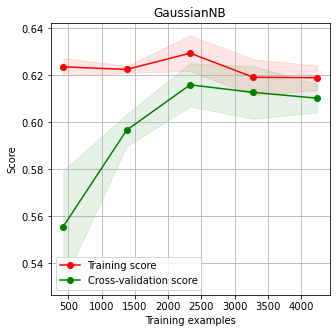

In [75]:
model8 = GaussianNB()
model8.fit(train_X, train_y)
preds8 = model8.predict(test_X)

roc_8 = roc_auc_score(test_y, preds8)
f1_8 = f1_score(test_y, preds8)
score_8 = model8.score(test_X, test_y)

print(f'ROC Score: {roc_8}, F1 Score: {f1_8} and Accuracy Score: {score_8}')

plot_learning_curve(model8, 'GaussianNB', train_X, train_y)

In [76]:
X = df_final2
y = df_final['HomeWin']
y = y.astype(np.float64)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, shuffle=True)

ROC Score: 0.6370387350804059, F1 score: 0.6396852164137156 and Accuracy Score: 0.6368271954674221.


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

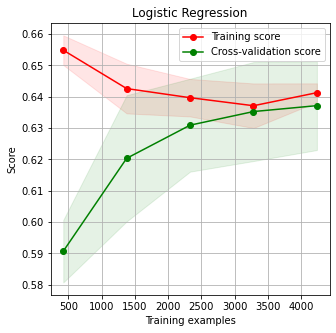

In [79]:
model9 = LogisticRegression(random_state=0,max_iter=500)
model9.fit(train_X, train_y)
preds9 = model9.predict(test_X)

roc_9 = roc_auc_score(test_y, preds9)
f1_9 = f1_score(test_y, preds9)
score_9 = model9.score(test_X, test_y)

print(f'ROC Score: {roc_9}, F1 score: {f1_9} and Accuracy Score: {score_9}.')

plot_learning_curve(model9, 'Logistic Regression', train_X, train_y)

ROC Score: 0.5922516996843352, F1 score: 0.6109012412304372 and Accuracy Score: 0.591501416430595


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

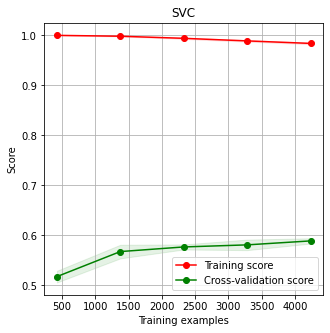

In [80]:
model10 = SVC(gamma=0.01)
model10.fit(train_X, train_y)
preds10 = model10.predict(test_X)

roc_10 = roc_auc_score(test_y, preds10)
f1_10 = f1_score(test_y, preds10)
score_10 = model10.score(test_X, test_y)

print(f'ROC Score: {roc_10}, F1 score: {f1_10} and Accuracy Score: {score_10}')

plot_learning_curve(model10, 'SVC', train_X, train_y)

ROC Score: 0.5994909294518631, F1 Score: 0.5980670835702102 and Accuracy Score: 0.5994334277620397


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

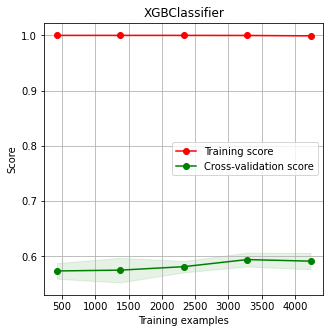

In [81]:
model11 = XGBClassifier(random_state=0)
model11.fit(train_X, train_y)
preds11 = model11.predict(test_X)

roc_11 = roc_auc_score(test_y, preds11)
f1_11 = f1_score(test_y, preds11)
score_11 = model11.score(test_X, test_y)

print(f'ROC Score: {roc_11}, F1 Score: {f1_11} and Accuracy Score: {score_11}')

plot_learning_curve(model11, 'XGBClassifier', train_X, train_y
                   )

ROC Score: 0.6315492747927888, F1 Score: 0.6389351081530783 and Accuracy Score: 0.6311614730878187


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

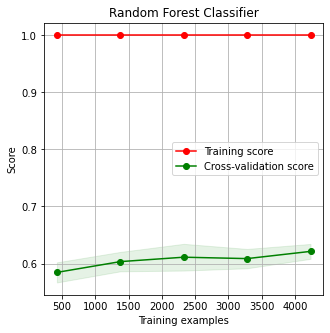

In [82]:
model12 = RandomForestClassifier(n_estimators=1000)
model12.fit(train_X, train_y)
preds12 = model12.predict(test_X)

roc_12 = roc_auc_score(test_y, preds12)
f1_12 = f1_score(test_y, preds12)
score_12 = model12.score(test_X, test_y)

print(f'ROC Score: {roc_12}, F1 Score: {f1_12} and Accuracy Score: {score_12}')

plot_learning_curve(model12, 'Random Forest Classifier', train_X, train_y
                   )

ROC Score: 0.5920577802777542, F1 Score: 0.5885714285714286 and Accuracy Score: 0.5920679886685553


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

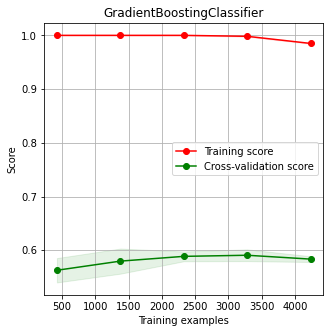

In [83]:
model13 = GradientBoostingClassifier(loss='deviance',n_estimators=1000,subsample=0.5,max_features='auto')
model13.fit(train_X, train_y)
preds13 = model13.predict(test_X)

roc_13 = roc_auc_score(test_y, preds13)
f1_13 = f1_score(test_y, preds13)
score_13 = model13.score(test_X, test_y)

print(f'ROC Score: {roc_13}, F1 Score: {f1_13} and Accuracy Score: {score_13}')

plot_learning_curve(model13, 'GradientBoostingClassifier', train_X, train_y)

ROC Score: 0.5866569321693031, F1 Score: 0.5912653975363941 and Accuracy Score: 0.5864022662889519


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

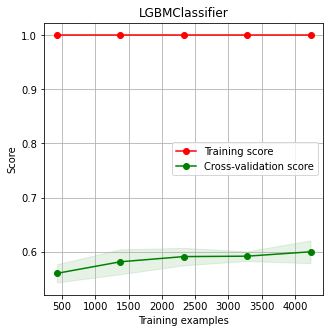

In [85]:
model14 = LGBMClassifier(n_estimators=1000,subsample=0.5)
model14.fit(train_X, train_y)
preds14 = model14.predict(test_X)

roc_14 = roc_auc_score(test_y, preds14)
f1_14 = f1_score(test_y, preds14)
score_14 = model14.score(test_X, test_y)

print(f'ROC Score: {roc_14}, F1 Score: {f1_14} and Accuracy Score: {score_14}')

plot_learning_curve(model14, 'LGBMClassifier', train_X, train_y
                   )

ROC Score: 0.6189496503029509, F1 Score: 0.62296918767507 and Accuracy Score: 0.6186968838526912


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

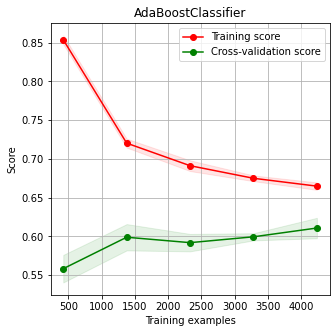

In [86]:
model15 = AdaBoostClassifier(random_state=0)
model15.fit(train_X, train_y)
preds15 = model15.predict(test_X)

roc_15 = roc_auc_score(test_y, preds15)
f1_15 = f1_score(test_y, preds15)
score_15 = model15.score(test_X, test_y)

print(f'ROC Score: {roc_15}, F1 Score: {f1_15} and Accuracy Score: {score_15}')

plot_learning_curve(model15, 'AdaBoostClassifier', train_X, train_y
                   )

ROC Score: 0.6303273256844327, F1 Score: 0.6353992183137912 and Accuracy Score: 0.6300283286118981


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

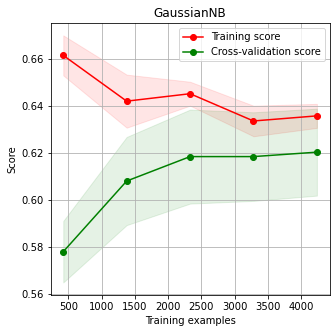

In [87]:
model16 = GaussianNB()
model16.fit(train_X, train_y)
preds16 = model16.predict(test_X)

roc_16 = roc_auc_score(test_y, preds16)
f1_16 = f1_score(test_y, preds16)
score_16 = model16.score(test_X, test_y)

print(f'ROC Score: {roc_16}, F1 Score: {f1_16} and Accuracy Score: {score_16}')

plot_learning_curve(model16, 'GaussianNB', train_X, train_y)

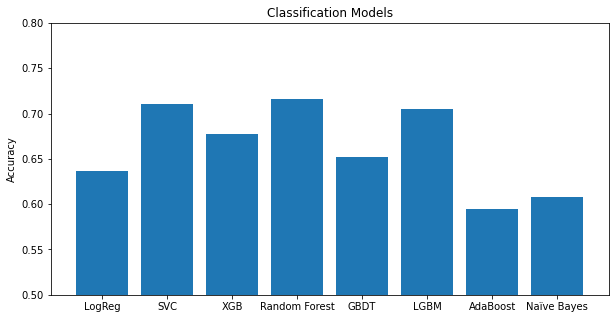

In [98]:
models = ('LogReg','SVC','XGB', 'Random Forest','GBDT','LGBM','AdaBoost', 'Naïve Bayes')
y_pos = np.arange(len(models))
accuracy = [score_1, score_2, score_3, score_4, score_5, score_6, score_7, score_8]
plt.figure(figsize=(10,5))
plt.bar(y_pos, accuracy, align='center')
plt.xticks(y_pos, models)
plt.ylim(bottom=0.5,top=0.8)
plt.ylabel('Accuracy')
plt.title('Classification Models')
plt.show()

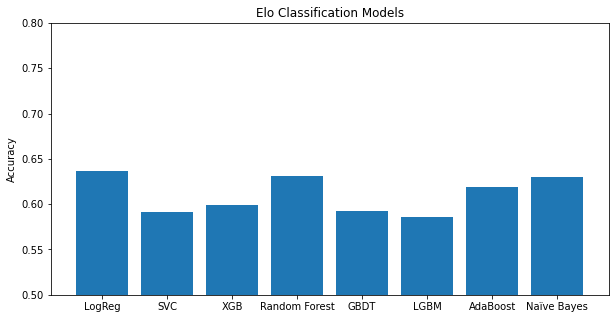

In [102]:
models = ('LogReg','SVC','XGB', 'Random Forest','GBDT','LGBM','AdaBoost', 'Naïve Bayes')
y_pos = np.arange(len(models))
accuracy = [score_9, score_10, score_11, score_12, score_13, score_14, score_15, score_16]
plt.figure(figsize=(10,5))
plt.bar(y_pos, accuracy, align='center')
plt.xticks(y_pos, models)
plt.ylim(bottom=0.5,top=0.8)
plt.ylabel('Accuracy')
plt.title('Elo Classification Models')
plt.show()